# Comparing effect of MUC5B Mutation in Colon cancer on Transcriptomics and Proteomics

Investigate how transcript and proteomic levels are altered when MUC5B is mutated in Colon cancer for proteins who showed significant differences in proteomic expression

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import cptac
import cptac.algorithms as al

co = cptac.Colon()

### Specify Mutation Gene

In [2]:
mutation_gene = 'MUC5B'

### Read in Trans Results and filter for Colon cancer and MUC5B Mutation

In [3]:
#Read in Results of Trans Analysis
Trans_Results = pd.read_csv("../Formatted_Trans_Results.csv")

#Filter for only Colon cancer, and only MUC5B Mutation
Colon = Trans_Results.loc[Trans_Results['Cancer_Type'] == 'Colon']
MUC5B_Colon = Colon.loc[Colon['Mutation_Gene'] == mutation_gene]

### Split proteomics and transcriptomics

In [4]:
MUC5B_Colon_Prot = MUC5B_Colon.loc[MUC5B_Colon['Omics'] == 'proteomics']
MUC5B_Colon_Trans = MUC5B_Colon.loc[MUC5B_Colon['Omics'] == 'transcriptomics']

### Display proteomics

In [5]:
print(len(MUC5B_Colon_Prot))
MUC5B_Colon_Prot

38


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
617,Colon,MUC5B,PCK2,NaN,proteomics,True,1.136850e-05
618,Colon,MUC5B,MRE11,NaN,proteomics,False,1.144045e-10
619,Colon,MUC5B,GPX2,NaN,proteomics,False,5.988006e-10
620,Colon,MUC5B,ANP32E,NaN,proteomics,False,3.042503e-09
621,Colon,MUC5B,KRT20,NaN,proteomics,False,3.969811e-09
622,Colon,MUC5B,RAD50,NaN,proteomics,False,9.817991e-09
623,Colon,MUC5B,PRDX5,NaN,proteomics,False,5.077905e-08
624,Colon,MUC5B,ARHGEF2,NaN,proteomics,False,7.919124e-08
625,Colon,MUC5B,NFKB2,NaN,proteomics,False,1.471187e-07
626,Colon,MUC5B,MRPS31,NaN,proteomics,False,3.790579e-07


### Display transcriptomics

In [6]:
print(len(MUC5B_Colon_Trans))
MUC5B_Colon_Trans

82


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
655,Colon,MUC5B,MUC20,NaN,transcriptomics,True,4.319530e-06
656,Colon,MUC5B,FRMD1,NaN,transcriptomics,True,1.340157e-05
657,Colon,MUC5B,ST6GAL1,NaN,transcriptomics,True,6.725471e-05
658,Colon,MUC5B,MUC12,NaN,transcriptomics,True,1.108167e-04
659,Colon,MUC5B,ST6GALNAC2,NaN,transcriptomics,True,6.152779e-04
661,Colon,MUC5B,GPX2,NaN,transcriptomics,False,1.758001e-10
662,Colon,MUC5B,POU5F1B,NaN,transcriptomics,False,4.688794e-10
663,Colon,MUC5B,RUBCNL,NaN,transcriptomics,False,1.541604e-09
664,Colon,MUC5B,ATP10B,NaN,transcriptomics,False,3.068562e-09
665,Colon,MUC5B,NUBPL,NaN,transcriptomics,False,3.884908e-09


<br><br>When MUC5B is mutated in colon cancer, 82 transcripts are significantly altered, yet only 38 proteomics <br><br>

### Generate lists of proteins significantly altered in proteomic expression and transcript expression when MUC5B mutated

In [7]:
prots_MUC5B_Colon = list(MUC5B_Colon_Prot['Protein'])
rna_MUC5B_Colon = list(MUC5B_Colon_Trans['Protein'])

### Make plot illustrating $Δ$ transcriptomics and  $Δ$ proteomics the above genes showing altered transcripts when MUC5B is mutated

### Compute $Δ$ proteomics for above proteins

In [8]:
delta_proteomics = {}

#Loop through proteins found in both lists
for prot in prots_MUC5B_Colon:
    #Use join omics to mutations to compare proteomic levels when mutation gene is mutated
    proteomic_df = co.join_omics_to_mutations(mutations_genes=mutation_gene, omics_df_name='proteomics',omics_genes=prot)
    
    #Use only Tumor samples
    proteomic_df = proteomic_df.loc[proteomic_df['Sample_Status'] == 'Tumor']
    
    #Split into mutated and wildtype groups
    mutated_df = proteomic_df.loc[proteomic_df[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor']
    wt_df = proteomic_df.loc[proteomic_df[mutation_gene + '_Mutation_Status'] == 'Wildtype_Tumor']
    
    #Compute mean proteomic values for both mutated and wildtype groups
    mutated_mean = np.mean(mutated_df[prot + '_proteomics'])
    wt_mean = np.mean(wt_df[prot + '_proteomics'])
    
    #Compute Delta (mutated mean - wildtype mean) proteomic value
    delta = mutated_mean - wt_mean
    
    #Store values in Dictionary
    delta_proteomics[prot] = delta

### Print $Δ$ proteomics

In [9]:
delta_proteomics

{'PCK2': -0.4707057421451788,
 'MRE11': -0.49227150595882985,
 'GPX2': -0.9922851029252437,
 'ANP32E': 0.49580552546045514,
 'KRT20': -1.12995872156013,
 'RAD50': -0.42198472372697726,
 'PRDX5': -0.7989992416034669,
 'ARHGEF2': 0.3267704767063922,
 'NFKB2': 0.3280462621885158,
 'MRPS31': -0.4409974539544961,
 'PCSK9': 1.2380817857142856,
 'HNF4A': -0.587741968325792,
 'VTN': 1.0499321235102923,
 'MYO15B': -0.5695529794149512,
 'NUBPL': -0.6704825027085591,
 'FUNDC1': -0.6671838383838384,
 'ACSL5': -0.6932684723726977,
 'ACE2': -1.087971111111111,
 'GALNT1': 0.39393033586132176,
 'A1CF': -0.6159492753623188,
 'TFCP2L1': -0.7365642857142858,
 'SLC16A3': 0.5541858613217768,
 'PLA2G4A': 0.7175556818181816,
 'AIFM1': -0.36898537378114843,
 'GYS1': 0.344387323943662,
 'ENGASE': -0.5300574214517877,
 'PKM': 0.45061711809317423,
 'SMCHD1': 0.3143657096424701,
 'ARHGEF1': 0.2677295232936077,
 'C8A': 0.6464355362946912,
 'ALDH2': -0.5069085048754064,
 'F9': 0.6836333694474541,
 'VAPB': -0.372087

### Compute $Δ$ transcriptomics for above proteins

In [10]:
delta_transcriptomics = {}

#Loop through proteins found in both lists
for prot in prots_MUC5B_Colon:
    #Use join omics to mutations to compare transcript levels when mutation gene is mutated
    transcript_df = co.join_omics_to_mutations(mutations_genes=mutation_gene, omics_df_name='transcriptomics',omics_genes=prot)
    
    #Use only Tumor samples
    transcript_df = transcript_df.loc[transcript_df['Sample_Status'] == 'Tumor']
    
    #Split into mutated and wildtype groups
    mutated_df = transcript_df.loc[transcript_df[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor']
    wt_df = transcript_df.loc[transcript_df[mutation_gene + '_Mutation_Status'] == 'Wildtype_Tumor']
    
    #Compute mean transcriptomic values for both mutated and wildtype groups
    mutated_mean = np.mean(mutated_df[prot + '_transcriptomics'])
    wt_mean = np.mean(wt_df[prot + '_transcriptomics'])
    
    #Compute Delta (mutated mean - wildtype mean) transcriptomics value
    delta = mutated_mean - wt_mean
    
    #Store values in Dictionary
    delta_transcriptomics[prot] = delta

VTN did not match any columns in transcriptomics dataframe. VTN_transcriptomics column inserted, but filled with NaN.
C8A did not match any columns in transcriptomics dataframe. C8A_transcriptomics column inserted, but filled with NaN.
F9 did not match any columns in transcriptomics dataframe. F9_transcriptomics column inserted, but filled with NaN.
CFHR5 did not match any columns in transcriptomics dataframe. CFHR5_transcriptomics column inserted, but filled with NaN.


### Print $Δ$ transcriptomics

In [11]:
delta_transcriptomics

{'PCK2': -0.3211936240037474,
 'MRE11': -0.46507224566338756,
 'GPX2': -1.3991120956399463,
 'ANP32E': 0.7669377871542409,
 'KRT20': -1.5011769807782471,
 'RAD50': -0.3414382559774989,
 'PRDX5': -0.8171597280825029,
 'ARHGEF2': 0.11864177215189642,
 'NFKB2': 0.4806880450070299,
 'MRPS31': -0.2877979840600151,
 'PCSK9': 0.48702705110173206,
 'HNF4A': -0.6896703234880501,
 'VTN': nan,
 'MYO15B': -0.6105529301453423,
 'NUBPL': -0.7866076887013591,
 'FUNDC1': -0.12509920300047028,
 'ACSL5': -0.734989310829814,
 'ACE2': -2.4860568682606665,
 'GALNT1': 0.5297064697608995,
 'A1CF': -1.42558691983122,
 'TFCP2L1': -1.1067818096577557,
 'SLC16A3': 0.5260790904828845,
 'PLA2G4A': 1.7358417252695784,
 'AIFM1': -0.3569603375527475,
 'GYS1': 0.26160904828879517,
 'ENGASE': -0.948000984528834,
 'PKM': 0.6689013127051187,
 'SMCHD1': 0.574299718706051,
 'ARHGEF1': 0.2586135489920327,
 'C8A': nan,
 'ALDH2': -0.2226856071261043,
 'F9': nan,
 'VAPB': -0.5147527894983579,
 'SSFA2': 0.31250768870135914,
 'M

## Illustrate $Δ$ proteomics and $Δ$ transcriptomics in a plot

### Format data in dataframe

In [12]:
#Make Pandas Dataframe
delta_proteomic_transcriptomic_df = pd.DataFrame(columns=['Protein','Delta_Proteomics','Delta_Transcriptomics'])

#Fill with values from delta proteomics and delta transcriptomics dictionaries
for key, val in delta_proteomics.items():
    delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.append({'Protein':key, 'Delta_Proteomics':val,'Delta_Transcriptomics':delta_transcriptomics[key]}, ignore_index = True)

In [13]:
delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.dropna(axis = 0)
delta_proteomic_transcriptomic_df

,Protein,Delta_Proteomics,Delta_Transcriptomics
0,PCK2,-0.470706,-0.321194
1,MRE11,-0.492272,-0.465072
2,GPX2,-0.992285,-1.399112
3,ANP32E,0.495806,0.766938
4,KRT20,-1.129959,-1.501177
5,RAD50,-0.421985,-0.341438
6,PRDX5,-0.798999,-0.817160
7,ARHGEF2,0.326770,0.118642
8,NFKB2,0.328046,0.480688
9,MRPS31,-0.440997,-0.287798


### Plot $Δ$ proteomics and $Δ$ transcriptomics in a scatter plot, along with line $ y = x $

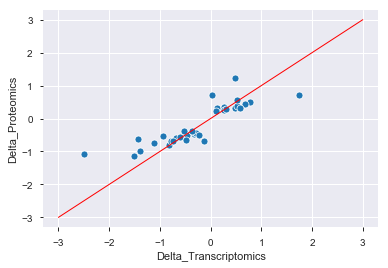

In [14]:
scatter_plot = sns.scatterplot(data=delta_proteomic_transcriptomic_df, x='Delta_Transcriptomics', y='Delta_Proteomics')
plt.plot([-3, 3], [-3, 3], linewidth=1, color='red')
